<a href="https://colab.research.google.com/github/dpmallick/Retail-Customer-segmentation/blob/main/Retail_Toyshop_CLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RFM Analysis and Computing future cash flow and revenue of a Retail Store**

# Overview

In this project, we will demonstrate:

i) Exploratory data analysis

ii) Convert a transaction dataset to customer dataset so that RFM analysis can be done

iii) Building segments by RFM- Cluster Analysis: "Statistical Segmentation"

iv) Building segments based on inputs from domain users - "Managerial Segmentation"

v) Build transition matrix for the last two years to see how the transition happened between segments. This will be used for computation future cash flow

vi) Calculate future cash flow using Retention and Revenue

vii) Calculate CLV and X times worth of the company


Dataset contains sales transaction details of a Retail Store selling gift items, books and stationery items. It contains 51243 transactions for 11 years from Jan 2005 till 31st December, 2015. 

Dataset contains 3 variables:
i)  Customer Id  

ii) Value of Transaction

iii) Date of Transaction




# Data Analysis

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Download the file 
!wget -q -O purchases.txt https://drive.google.com/uc?id=1LP65AWtwqCCM8AkppLBcMIhC_fjVZvNa&export=download
# Load text file and store it in dataframe df
df = pd.read_csv('/content/purchases.txt', sep='\t', header=None, names = ["CustomerId", "Amount", "Date"])

In [ ]:
# Read the first 5 entries
df.head()

,CustomerId,Amount,Date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [ ]:
df.shape

(51243, 3)

In [ ]:
# Check the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerId  51243 non-null  int64  
 1   Amount      51243 non-null  float64
 2   Date        51243 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
# Convert date to datetime type
df['Date'] = pd.to_datetime(df['Date'])
# Convert Customerid to categorical variable
df['CustomerId'] = df['CustomerId'].astype('str')

In [ ]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CustomerId  51243 non-null  object        
 1   Amount      51243 non-null  float64       
 2   Date        51243 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
# Get the year from the date
df['Year'] = pd. DatetimeIndex(df['Date']). year
# Reference Date
ref_date = pd.to_datetime('2016-01-01')
# Calculate date difference
df['DaysSince'] = (ref_date - df['Date']).dt.days
df

,CustomerId,Amount,Date,Year,DaysSince
0,760,25.0,2009-11-06,2009,2247
1,860,50.0,2012-09-28,2012,1190
2,1200,100.0,2005-10-25,2005,3720
3,1420,50.0,2009-07-09,2009,2367
4,1940,70.0,2013-01-25,2013,1071
...,...,...,...,...,...
51238,163230,30.0,2011-11-12,2011,1511
51239,154410,100.0,2013-11-15,2013,777
51240,189270,30.0,2014-12-23,2014,374
51241,173810,30.0,2015-05-28,2015,218


**Year wise transaction analysis**

In [ ]:
# Number of transactions per year
df.Year.value_counts()

2015    6197
2012    5960
2013    5912
2014    5739
2009    5054
2010    4939
2011    4785
2007    4674
2008    4331
2006    2182
2005    1470
Name: Year, dtype: int64

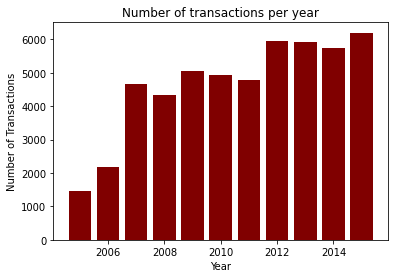

<Figure size 360x360 with 0 Axes>

In [ ]:
# Bar plot showing number of transactions per year
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.title("Number of transactions per year")
plt.bar(height = df.Year.value_counts(), x = df.Year.value_counts().index,color='Maroon')
plt.figure(figsize=(5,5))
plt.show()

In [ ]:
# Total Sales per year
dfyear = df.groupby('Year')['Amount'].sum().reset_index()
dfyear

,Year,Amount
0,2005,82064.40
1,2006,114010.49
2,2007,230260.00
3,2008,229853.88
4,2009,256466.51
5,2010,290116.92
6,2011,303939.85
7,2012,374963.34
8,2013,401610.18
9,2014,432665.20


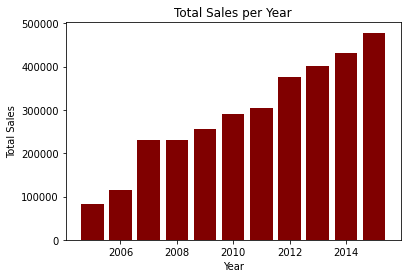

<Figure size 360x360 with 0 Axes>

In [ ]:
# Bar plot showing total sales per year
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales per Year")
plt.bar(height = dfyear.Amount, x = dfyear.Year,color='Maroon')
plt.figure(figsize=(5,5))
plt.show()

In [ ]:
# Average sales per year
dfyeara = df.groupby('Year')['Amount'].mean().reset_index()
dfyeara

,Year,Amount
0,2005,55.826122
1,2006,52.250454
2,2007,49.264014
3,2008,53.071780
4,2009,50.745253
5,2010,58.740012
6,2011,63.519300
7,2012,62.913312
8,2013,67.931357
9,2014,75.390347


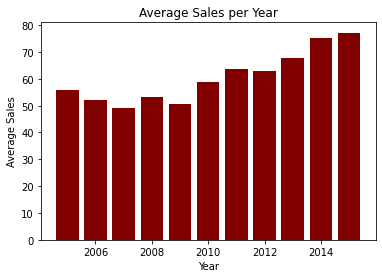

<Figure size 360x360 with 0 Axes>

In [ ]:
# Bar plot showing average sales per year
plt.xlabel("Year")
plt.ylabel("Average Sales")
plt.title("Average Sales per Year")
plt.bar(height = dfyeara.Amount, x = dfyeara.Year,color='Maroon')
plt.figure(figsize=(5,5))
plt.show()

In [ ]:
dfyearwise = pd.DataFrame(columns=['Year', 'NumberofTransactions', 'AverageSales', 'TotalSales'])
dfyearwise['Year'] = dfyear['Year']
dfyearwise['NumberofTransactions'] = df.Year.value_counts().sort_index(ascending=True).to_frame().values
dfyearwise['AverageSales'] = dfyeara['Amount']
dfyearwise['TotalSales'] = dfyear['Amount']
dfyearwise

,Year,NumberofTransactions,AverageSales,TotalSales
0,2005,1470,55.826122,82064.40
1,2006,2182,52.250454,114010.49
2,2007,4674,49.264014,230260.00
3,2008,4331,53.071780,229853.88
4,2009,5054,50.745253,256466.51
5,2010,4939,58.740012,290116.92
6,2011,4785,63.519300,303939.85
7,2012,5960,62.913312,374963.34
8,2013,5912,67.931357,401610.18
9,2014,5739,75.390347,432665.20


# RFM Analysis

RFM Analysis is a customer segmentation technique that uses past buying behaviour to segment customers

Past buying behaviour is gauged in terms of

**Recency:** When was the last time, customer bought something from the store. It is the difference between a reference date(say today) and the last time customer bought something.

**Frequency:** How often customer buys something from the store. It is equal to number of customer visits to store where they bought something.

**Monetary:** The average value of purchase, customer makes per occasion.

In [ ]:
# Get recency, days since first purchase and average purchase amount for all the customers
df1 = df.groupby('CustomerId').agg(AveragePurchaseAmount = ("Amount" , 'mean'),Recency = ('DaysSince' , 'min'), FirstPurchase
                                  = ('DaysSince' , 'max')).reset_index()
df1.head()

,CustomerId,AveragePurchaseAmount,Recency,FirstPurchase
0,10,30.000000,3829,3829
1,1000,22.500000,1120,3710
2,100000,35.000000,2072,2750
3,100010,27.857143,413,2750
4,100020,30.000000,2750,2750


In [ ]:
# Get frequency(number of times a customer visited the store) of all the customers
df_frequency = df.CustomerId.value_counts().reset_index()
df_frequency.columns = ['CustomerId', "Frequency"] 
df_frequency.head()

,CustomerId,Frequency
0,9720,45
1,109370,41
2,119430,38
3,10720,37
4,1420,34


In [ ]:
# Build the RFM dataframe
rfm = df1.merge(df_frequency, how='inner', on='CustomerId')
rfm.head()

,CustomerId,AveragePurchaseAmount,Recency,FirstPurchase,Frequency
0,10,30.000000,3829,3829,1
1,1000,22.500000,1120,3710,2
2,100000,35.000000,2072,2750,2
3,100010,27.857143,413,2750,7
4,100020,30.000000,2750,2750,1


In [ ]:
# Explore the data
rfm.describe()

,AveragePurchaseAmount,Recency,FirstPurchase,Frequency
count,18417.000000,18417.000000,18417.000000,18417.000000
mean,57.792985,1253.037900,1984.009882,2.782375
std,154.360109,1081.437868,1133.405441,2.936888
min,5.000000,1.000000,1.000000,1.000000
25%,21.666667,244.000000,988.000000,1.000000
50%,30.000000,1070.000000,2087.000000,2.000000
75%,50.000000,2130.000000,2992.000000,3.000000
max,4500.000000,4014.000000,4016.000000,45.000000


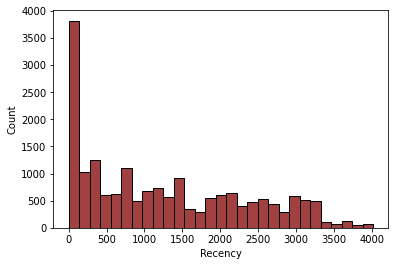

In [ ]:
# Histogram for Recency
sns.histplot(rfm['Recency'], color = 'Maroon')

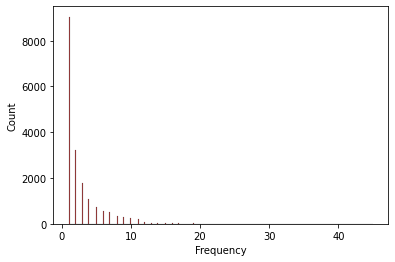

In [ ]:
# Histogram for Frequency
sns.histplot(rfm['Frequency'], color = 'Maroon')

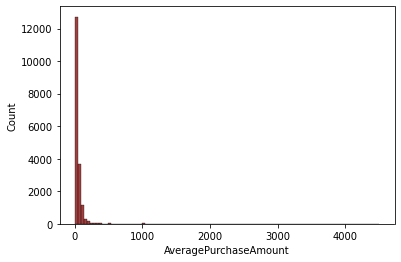

In [ ]:
# Histogram for average purchase amount
sns.histplot(rfm['AveragePurchaseAmount'], bins=100, color = 'Maroon')

In [ ]:
# Create a new dataframe new_rfm by copying rfm dataframe
new_rfm = rfm[['CustomerId','AveragePurchaseAmount','Recency','Frequency']].copy()
new_rfm.set_index('CustomerId')
new_rfm

,CustomerId,AveragePurchaseAmount,Recency,Frequency
0,10,30.000000,3829,1
1,1000,22.500000,1120,2
2,100000,35.000000,2072,2
3,100010,27.857143,413,7
4,100020,30.000000,2750,1
...,...,...,...,...
18412,99950,30.000000,1097,2
18413,99960,2007.000000,2752,1
18414,99970,46.500000,30,10
18415,99980,50.000000,2750,1


In [ ]:
# Since Average Purchase amount is right skewed, we have to apply log transformation
new_rfm['AveragePurchaseAmount'] = np.log(new_rfm['AveragePurchaseAmount'])

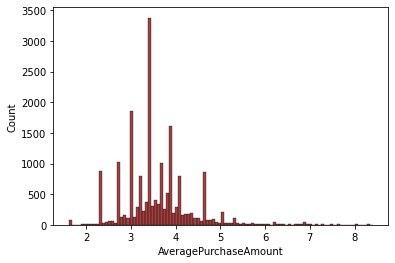

In [ ]:
# Histogram for average purchase amount
sns.histplot(new_rfm['AveragePurchaseAmount'], bins=100, color = 'Maroon')

In [ ]:
# Standardize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_rfm_scaled = scaler.fit_transform(new_rfm)

# Segmentation of Customers based on RFM data

a) Using Hierarchical clustering and KMeans - 9 cluster solution

b) based on inputs from Business experts and Managers

**A) Using Hierarchical Clustering and K-Means**

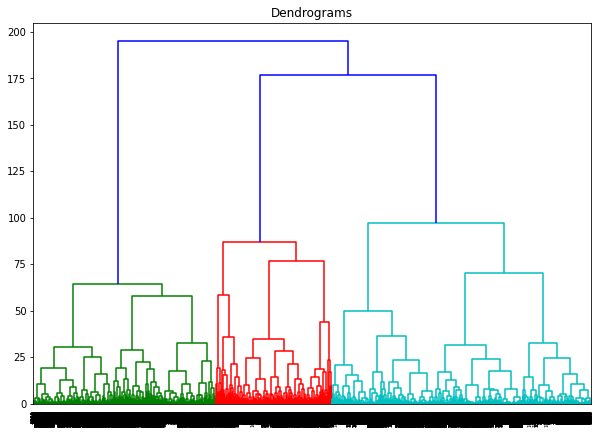

In [ ]:
# Hierarchical Segmentation
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7)) 
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(new_rfm_scaled, method='ward'))

In [ ]:
# For 9 cluster solution
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')  
segment = cluster.fit_predict(new_rfm_scaled)
rfm['Cluster'] = segment
rfm.head()

      CustomerId  AveragePurchaseAmount  Recency  FirstPurchase  Frequency  \
0             10              30.000000     3829           3829          1   
1           1000              22.500000     1120           3710          2   
2         100000              35.000000     2072           2750          2   
3         100010              27.857143      413           2750          7   
4         100020              30.000000     2750           2750          1   
...          ...                    ...      ...            ...        ...   
18412      99950              30.000000     1097           2752          2   
18413      99960            2007.000000     2752           2752          1   
18414      99970              46.500000       30           2750         10   
18415      99980              50.000000     2750           2750          1   
18416      99990              60.000000     2750           2750          1   

       Cluster  
0            7  
1            0  
2           

In [ ]:
# Get segment wise Recency, Frequency and AveragePurchaseAmount
rfm_segment = pd.DataFrame(columns=['Cluster','Recency','Frequency','AveragePurchaseAmount'])
rfm_segment['Cluster'] = rfm['Cluster']
rfm_segment['Recency'] = rfm['Recency']
rfm_segment['Frequency'] = rfm['Frequency']
rfm_segment['AveragePurchaseAmount'] = rfm['AveragePurchaseAmount']
rfm_segment.head()

,Cluster,Recency,Frequency,AveragePurchaseAmount
0,7,3829,1,30.000000
1,0,1120,2,22.500000
2,7,2072,2,35.000000
3,5,413,7,27.857143
4,7,2750,1,30.000000


In [ ]:
# Get average value per segment
rfm_segment_agg = rfm_segment.groupby('Cluster').mean()
rfm_segment_agg['Percent'] = round((rfm.groupby('Cluster')['CustomerId'].count() * 100 ) / len(rfm), 2) 
rfm_segment_agg.reset_index()

,Cluster,Recency,Frequency,AveragePurchaseAmount,Percent
0,0,2195.269458,2.455483,47.413250,18.42
1,1,658.011532,1.663513,81.863097,18.36
2,2,232.117647,11.486736,39.299790,4.71
3,3,379.939860,7.401399,168.836553,3.88
4,4,1530.480879,1.309890,22.967912,12.35
5,5,285.108497,5.255401,36.513232,11.31
6,6,387.912608,1.521244,24.993474,15.72
7,7,2857.423311,1.285877,21.041082,14.30
8,8,1191.735632,1.833333,1240.277204,0.94


**B) Customer Segmentation based on inputs from business experts and Managers**

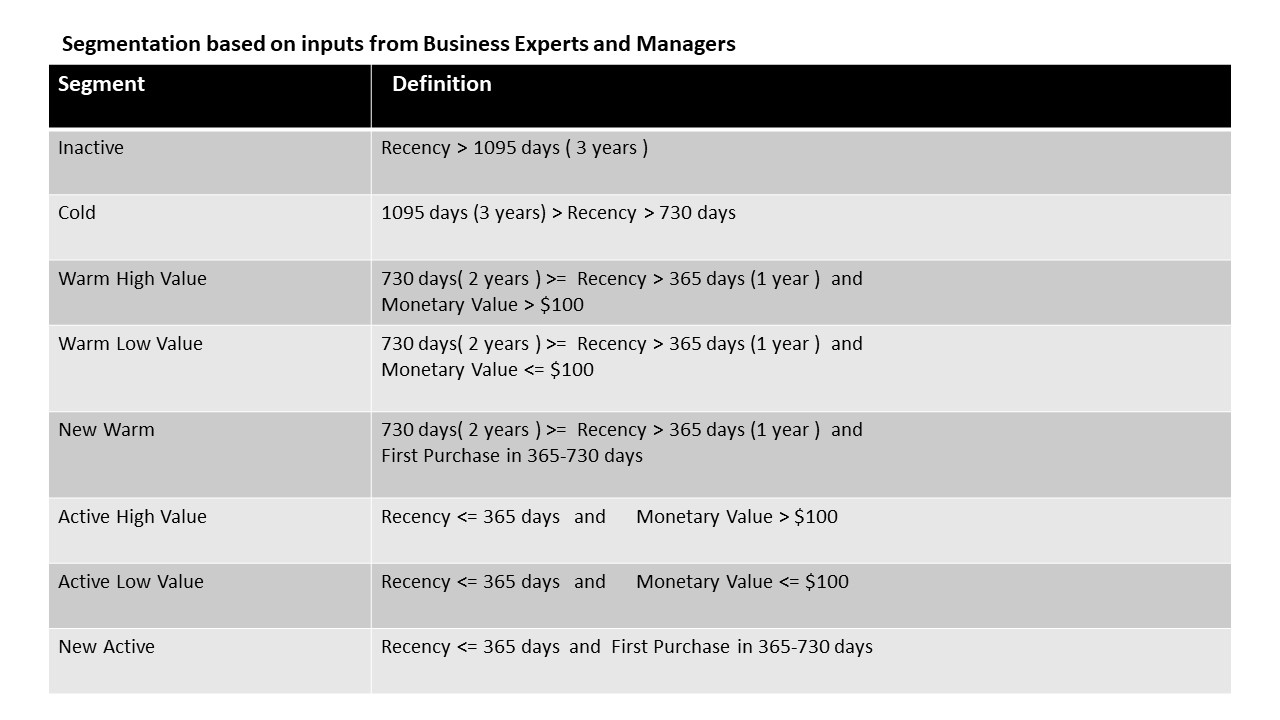

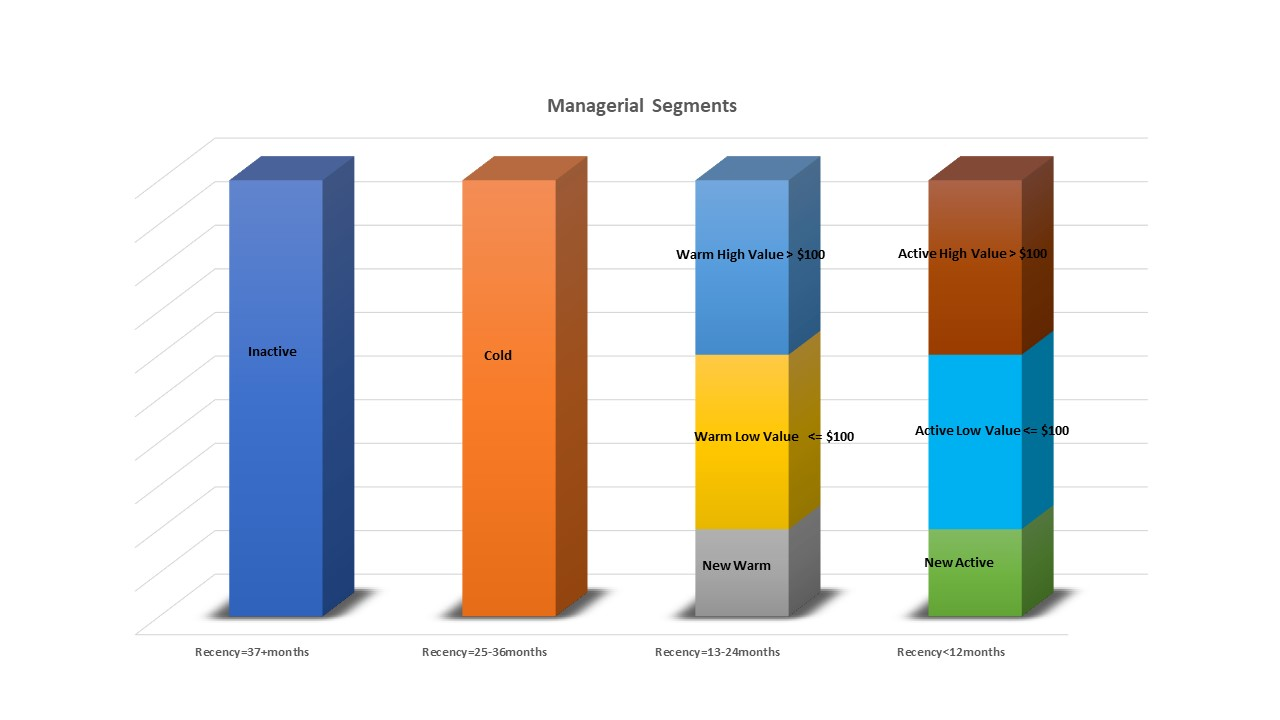

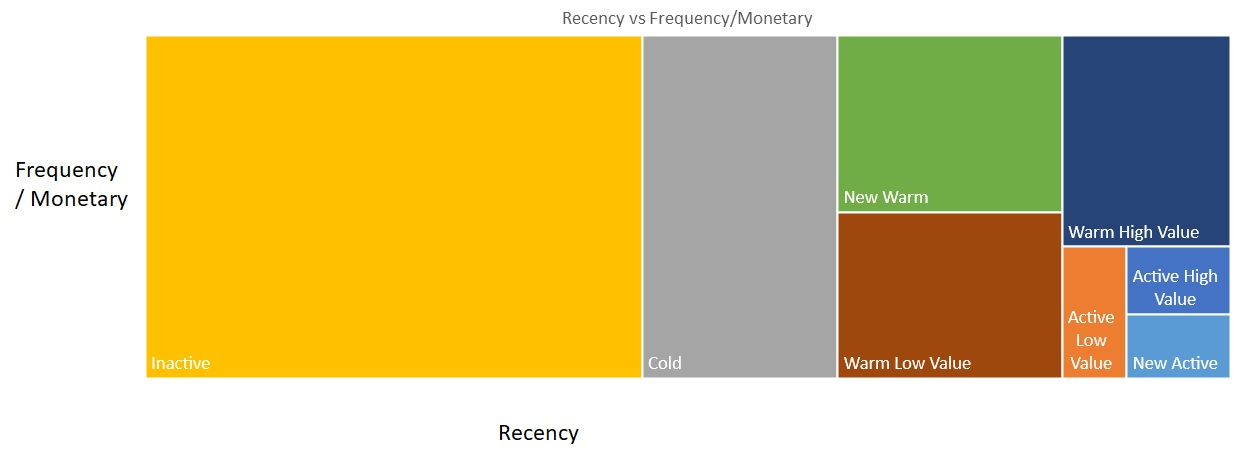

Customer segmentation will be based on the domain rules as per the segment definition based on Recency and Monetary Value

In [ ]:
# Do RFM analysis for year 2015
customers_2015 = rfm[['CustomerId','AveragePurchaseAmount','Recency','Frequency', 'FirstPurchase']].copy()

In [ ]:
# Function to determine segment based on recency, first purchase and average purchase amount
def get_mgr_segment(iv_recency, iv_firstpurchase, iv_avgpur):
    if iv_recency > (365 * 3):
        rv_segment = "Inactive"
        return rv_segment
    elif iv_recency > ( 365 * 2) and iv_recency <= (365 * 3):
        rv_segment = "Cold"
        return rv_segment
    elif iv_recency > 365 and iv_firstpurchase <= (365 * 2):
        rv_segment = "New Warm"
        return rv_segment
    elif iv_recency > 365 and iv_avgpur < 100:
        rv_segment = "Warm Low Value"
        return rv_segment
    elif iv_recency > 365 and iv_avgpur >= 100:
        rv_segment = "Warm High Value"
        return rv_segment
    elif iv_recency <= 365 and iv_firstpurchase <= 365:
        rv_segment = "New Active"
        return rv_segment
    elif iv_recency <= 365 and iv_avgpur < 100:
        rv_segment = "Active Low Value"
        return rv_segment
    elif iv_recency <= 365 and iv_avgpur >= 100:
        rv_segment = "Active High Value"
        return rv_segment

    

In [ ]:
# Assign the customers to Segment based on the definition
customers_2015['Segment'] = customers_2015.apply(lambda x: get_mgr_segment(x['Recency'],x['FirstPurchase'], x['AveragePurchaseAmount']),axis=1)

In [ ]:
# Check the first 5 entries
customers_2015.head()

,CustomerId,AveragePurchaseAmount,Recency,Frequency,FirstPurchase,Segment
0,10,30.000000,3829,1,3829,Inactive
1,1000,22.500000,1120,2,3710,Inactive
2,100000,35.000000,2072,2,2750,Inactive
3,100010,27.857143,413,7,2750,Warm Low Value
4,100020,30.000000,2750,1,2750,Inactive


In [ ]:
# Check the % of customers in each segment
customers_2015['Segment'].value_counts() * 100 / len(customers_2015)

Inactive             49.725797
Active Low Value     17.988815
Cold                 10.332845
New Active            8.209806
New Warm              5.093120
Warm Low Value        4.892219
Active High Value     3.111256
Warm High Value       0.646142
Name: Segment, dtype: float64

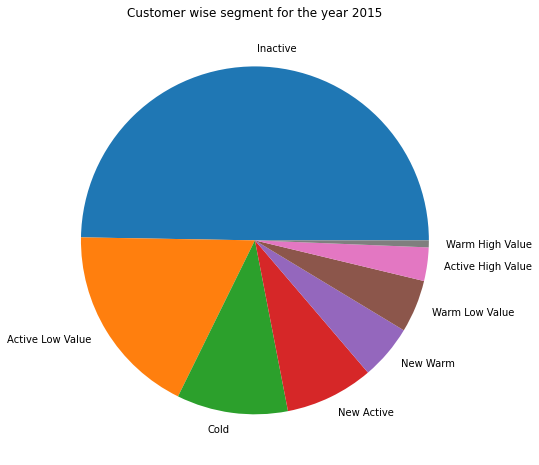

In [ ]:
# Visualize the customer segmentation for year 2015
plt.figure(figsize = (10, 8))
plt.pie(customers_2015['Segment'].value_counts() * 100 / len(customers_2015), labels = customers_2015['Segment'].value_counts().index)
plt.title("Customer wise segment for the year 2015")
plt.show()

In [ ]:
# Get the RFM for customers for years 2015 and before
customers_2015_segment = pd.DataFrame(columns=['Segment','Recency','Frequency','AveragePurchaseAmount'])
customers_2015_segment['Segment'] = customers_2015['Segment']
customers_2015_segment['Recency'] = customers_2015['Recency']
customers_2015_segment['Frequency'] = customers_2015['Frequency']
customers_2015_segment['AveragePurchaseAmount'] = customers_2015['AveragePurchaseAmount']

In [ ]:
# Get the average value
customers_2015_grp = customers_2015.groupby('Segment').mean()

In [ ]:
# Build the dataframe for customers for year 2015
customers_2015_grp.reset_index()

,Segment,AveragePurchaseAmount,Recency,Frequency,FirstPurchase
0,Active High Value,240.045740,88.820244,5.888307,1985.909250
1,Active Low Value,40.724525,108.361002,5.935406,2003.801992
2,Cold,51.739893,857.781398,2.303205,1432.117183
3,Inactive,48.112771,2178.110832,1.814479,2546.168377
4,New Active,77.133847,84.990741,1.045635,90.013889
5,New Warm,66.599026,509.304904,1.044776,516.622601
6,Warm High Value,327.407457,455.126050,4.714286,2015.352941
7,Warm Low Value,38.591926,474.377358,4.531632,2063.639290


In [ ]:
# Sort the dataframe based on predefined index
#customers_2015_grp.set_index("Segment")
customers_2015_grp.reindex(["Inactive", "Cold", "Warm High Value", "Warm Low Value", "New Warm", 
                            "Active High Value", "Active Low Value" , "New Active"])

,AveragePurchaseAmount,Recency,Frequency,FirstPurchase
Segment,,,,
Inactive,48.112771,2178.110832,1.814479,2546.168377
Cold,51.739893,857.781398,2.303205,1432.117183
Warm High Value,327.407457,455.126050,4.714286,2015.352941
Warm Low Value,38.591926,474.377358,4.531632,2063.639290
New Warm,66.599026,509.304904,1.044776,516.622601
Active High Value,240.045740,88.820244,5.888307,1985.909250
Active Low Value,40.724525,108.361002,5.935406,2003.801992
New Active,77.133847,84.990741,1.045635,90.013889


Managerial Segment is also created for year 2014 as this will be used later for computing transition within segments and for computing future revenues of company

In [ ]:
# Build the dataframe for customers who visited the store on 2014
df2014 = df[df["DaysSince"] > 365]

In [ ]:
df2014

,CustomerId,Amount,Date,Year,DaysSince
0,760,25.0,2009-11-06,2009,2247
1,860,50.0,2012-09-28,2012,1190
2,1200,100.0,2005-10-25,2005,3720
3,1420,50.0,2009-07-09,2009,2367
4,1940,70.0,2013-01-25,2013,1071
...,...,...,...,...,...
51237,122530,40.0,2011-10-14,2011,1540
51238,163230,30.0,2011-11-12,2011,1511
51239,154410,100.0,2013-11-15,2013,777
51240,189270,30.0,2014-12-23,2014,374


In [ ]:
# Change the recency value based on 2014 date(1 year before)
df2014['DaysSince'] = df2014['DaysSince'] - 365

C:\Users\DEBOPR~1\AppData\Local\Temp/ipykernel_26048/1535666333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['DaysSince'] = df2014['DaysSince'] - 365


In [ ]:
# Check the entries of the dataframe
df2014

,CustomerId,Amount,Date,Year,DaysSince
0,760,25.0,2009-11-06,2009,1882
1,860,50.0,2012-09-28,2012,825
2,1200,100.0,2005-10-25,2005,3355
3,1420,50.0,2009-07-09,2009,2002
4,1940,70.0,2013-01-25,2013,706
...,...,...,...,...,...
51237,122530,40.0,2011-10-14,2011,1175
51238,163230,30.0,2011-11-12,2011,1146
51239,154410,100.0,2013-11-15,2013,412
51240,189270,30.0,2014-12-23,2014,9


In [ ]:
# Group the data for aggregation
df2014_grp = df2014.groupby('CustomerId').agg(AveragePurchaseAmount = ("Amount" , 'mean'),Recency = ('DaysSince' , 'min'), FirstPurchase
                                  = ('DaysSince' , 'max'))

In [ ]:
# Get the count of transactions
df2014_frequency = df2014.CustomerId.value_counts().reset_index()
df2014_frequency.columns = ['CustomerId', "Frequency"] 

In [ ]:
# Build the RFM dataframe
rfm_2014 = df2014_grp.merge(df2014_frequency, how='inner', on='CustomerId')

In [ ]:
customers_2014 = rfm_2014[['CustomerId','AveragePurchaseAmount','Recency','Frequency', 'FirstPurchase']].copy()

In [ ]:
customers_2014['Segment'] = customers_2014.apply(lambda x: get_mgr_segment(x['Recency'],x['FirstPurchase'], x['AveragePurchaseAmount']),axis=1)

In [ ]:
customers_2014

,CustomerId,AveragePurchaseAmount,Recency,Frequency,FirstPurchase,Segment
0,10,30.000000,3464,1,3464,Inactive
1,1000,22.500000,755,2,3345,Cold
2,100000,35.000000,1707,2,2385,Inactive
3,100010,27.857143,48,7,2385,Active Low Value
4,100020,30.000000,2385,1,2385,Inactive
...,...,...,...,...,...,...
16900,99950,30.000000,732,2,2387,Cold
16901,99960,2007.000000,2387,1,2387,Inactive
16902,99970,45.625000,48,8,2385,Active Low Value
16903,99980,50.000000,2385,1,2385,Inactive


In [ ]:
# Get the percentage wise breakup of different segments
customers_2014['Segment'].value_counts() * 100 /len(customers_2014)

Inactive             44.436557
Active Low Value     17.811298
Cold                 12.735877
New Active            8.500444
New Warm              7.394262
Warm Low Value        5.655132
Active High Value     2.809820
Warm High Value       0.656610
Name: Segment, dtype: float64

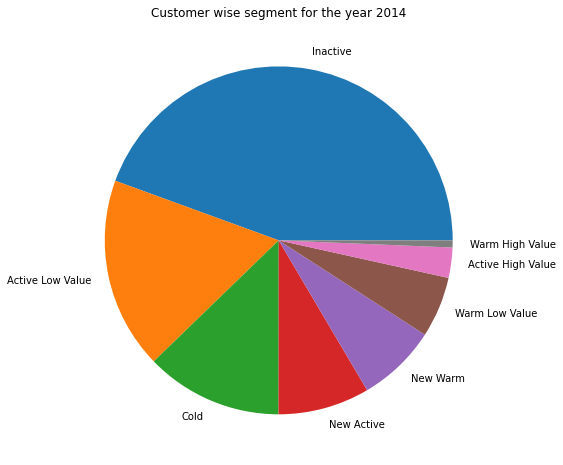

In [ ]:
# Visualize the data
plt.figure(figsize = (10, 8))
plt.pie(customers_2014['Segment'].value_counts() * 100 / len(customers_2014), labels = customers_2014['Segment'].value_counts().index)
plt.title("Customer wise segment for the year 2014")
plt.show()

In [ ]:
# Build the customer related data for year 2014
customers_2014_segment = pd.DataFrame(columns=['Segment','Recency','Frequency','AveragePurchaseAmount'])
customers_2014_segment['Segment'] = customers_2014['Segment']
customers_2014_segment['Recency'] = customers_2014['Recency']
customers_2014_segment['Frequency'] = customers_2014['Frequency']
customers_2014_segment['AveragePurchaseAmount'] = customers_2014['AveragePurchaseAmount']

NameError: ignored

In [ ]:
customers_2014_grp = customers_2014.groupby('Segment').mean()

In [ ]:
customers_2014_grp.reindex(["Inactive", "Cold", "Warm High Value", "Warm Low Value", "New Warm", 
                            "Active High Value", "Active Low Value" , "New Active"])

,AveragePurchaseAmount,Recency,Frequency,FirstPurchase
Segment,,,,
Inactive,48.111199,2058.441294,1.730964,2353.036874
Cold,51.114605,866.616814,2.254064,1565.444032
Warm High Value,187.849110,461.198198,4.414414,1878.810811
Warm Low Value,37.382060,470.661088,4.361925,1945.426778
New Warm,51.367653,497.317600,1.057600,504.880000
Active High Value,261.902155,85.338947,5.696842,1838.050526
Active Low Value,40.459174,98.091000,5.633677,1796.351378
New Active,69.725159,132.086987,1.070981,142.871260


In [ ]:
# Get the  revenue customerwise for year 2015
revenue_2015 = df.loc[df.Year == 2015, ["CustomerId", "Amount"]]

In [ ]:
revenue_2015

,CustomerId,Amount
912,131450,100.0
918,198220,20.0
934,153940,30.0
950,222340,500.0
962,159670,80.0
...,...,...
51202,254130,60.0
51214,141760,50.0
51215,232530,100.0
51231,232850,50.0


In [ ]:
# aggregate the revenue based on customer id
revenue_2015_grp = revenue_2015.groupby('CustomerId')['Amount'].sum().reset_index()

In [ ]:
# Rename the column
revenue_2015_grp.rename(columns = {'Amount':'Revenue'}, inplace = True)
revenue_2015_grp

,CustomerId,Revenue
0,100080,20.0
1,100100,50.0
2,100140,75.0
3,100260,90.0
4,100280,60.0
...,...,...
5393,99480,20.0
5394,9960,40.0
5395,99640,30.0
5396,99810,20.0


In [ ]:
# Check the number of entries
revenue_2015_grp.shape

(5398, 2)

In [ ]:

actual_2015 = customers_2015.merge(revenue_2015_grp, how='left', on='CustomerId')

In [ ]:
actual_2015.shape

(18417, 7)

In [ ]:
# Replace nan values with 0
actual_2015['Revenue'] = actual_2015['Revenue'].replace(np.nan, 0)

In [ ]:
# Check the first 5 entries
actual_2015.head()

,CustomerId,AveragePurchaseAmount,Recency,Frequency,FirstPurchase,Segment,Revenue
0,10,30.000000,3829,1,3829,Inactive,0.0
1,1000,22.500000,1120,2,3710,Inactive,0.0
2,100000,35.000000,2072,2,2750,Inactive,0.0
3,100010,27.857143,413,7,2750,Warm Low Value,0.0
4,100020,30.000000,2750,1,2750,Inactive,0.0


In [ ]:
# Get the average revenue per segment
revenue_segment_2015 = actual_2015.groupby('Segment')['Revenue'].mean().reset_index()

In [ ]:
# Check the entries
revenue_segment_2015

,Segment,Revenue
0,Active High Value,323.568935
1,Active Low Value,52.306043
2,Cold,0.000000
3,Inactive,0.000000
4,New Active,79.166144
5,New Warm,0.000000
6,Warm High Value,0.000000
7,Warm Low Value,0.000000


In [ ]:
# Sort the output in predefined order
revenue_segment_2015_1 = revenue_segment_2015.reindex([3,2,6,7,5,0,1,4])

In [ ]:
# Check the entries
revenue_segment_2015_1

,Segment,Revenue
3,Inactive,0.000000
2,Cold,0.000000
6,Warm High Value,0.000000
7,Warm Low Value,0.000000
5,New Warm,0.000000
0,Active High Value,323.568935
1,Active Low Value,52.306043
4,New Active,79.166144


# Transition within segments over the years

Movement of customers from one segment (in 2014) to another segment(in 2015) to get segment transition

In [ ]:
# Build the transition matrix
forward = customers_2014.merge(revenue_2015_grp, how='left', on = 'CustomerId')

In [ ]:
# Replace NaN with 0
forward['Revenue'] = forward['Revenue'].replace(np.nan, 0)

In [ ]:
# Check the first 5 entries
forward.head(5)

,CustomerId,AveragePurchaseAmount,Recency,Frequency,FirstPurchase,Segment,Revenue
0,10,30.000000,3464,1,3464,Inactive,0.0
1,1000,22.500000,755,2,3345,Cold,0.0
2,100000,35.000000,1707,2,2385,Inactive,0.0
3,100010,27.857143,48,7,2385,Active Low Value,0.0
4,100020,30.000000,2385,1,2385,Inactive,0.0


In [ ]:
# Get the average value
forward_segment_grp = forward.groupby('Segment')['Revenue'].mean().reset_index()

In [ ]:
# Rename the columns
forward_segment_grp.rename(columns = {'Segment': 'Group'})

,Group,Revenue
0,Active High Value,254.077895
1,Active Low Value,41.896556
2,Cold,6.108221
3,Inactive,2.949466
4,New Active,31.046625
5,New Warm,5.064000
6,Warm High Value,114.459459
7,Warm Low Value,13.494770


In [ ]:
forward_segment_grp.set_index("Segment")

,Revenue
Segment,
Active High Value,254.077895
Active Low Value,41.896556
Cold,6.108221
Inactive,2.949466
New Active,31.046625
New Warm,5.064000
Warm High Value,114.459459
Warm Low Value,13.494770


In [ ]:
# Sort it based on predefined index
forward_segment_grp1 = forward_segment_grp.reindex([3,2,6,7,5,0,1,4])

In [ ]:
forward_segment_grp1

,Segment,Revenue
3,Inactive,2.949466
2,Cold,6.108221
6,Warm High Value,114.459459
7,Warm Low Value,13.494770
5,New Warm,5.064000
0,Active High Value,254.077895
1,Active Low Value,41.896556
4,New Active,31.046625


Text(0.5, 0, "{0: 'Active High Value', 1: 'Active Low Value', 2: 'Cold', 3: 'Inactive', 4: 'New Active', 5: 'New Warm', 6: 'Warm High Value', 7: 'Warm Low Value'}")

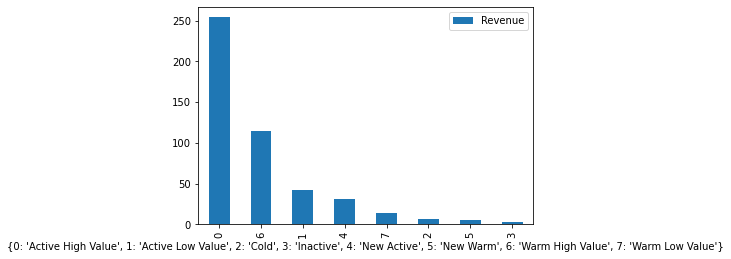

In [ ]:
forward_segment_grp1[['Segment', 'Revenue']].sort_values(by='Revenue',ascending=False).plot(kind='bar', color= 'Maroon')
map_level = {0:"Active High Value", 1: "Active Low Value",
             2: "Cold", 3 : "Inactive", 4: "New Active",
            5 : "New Warm", 6 : "Warm High Value",
            7 : "Warm Low Value"}
plt.xlabel(map_level)

In [ ]:
#customers_2015_sfx = customers_2015
#customers_2015.rename(columns={'AveragePurchaseAmount_2015'})
new_data = pd.DataFrame.merge(customers_2014,customers_2015,on='CustomerId', how='left'  ) #suffixes=('_2014', '_2015'),

In [ ]:
new_data

,CustomerId,AveragePurchaseAmount_x,Recency_x,Frequency_x,FirstPurchase_x,Segment_x,AveragePurchaseAmount_y,Recency_y,Frequency_y,FirstPurchase_y,Segment_y
0,10,30.000000,3464,1,3464,Inactive,30.000000,3829,1,3829,Inactive
1,1000,22.500000,755,2,3345,Cold,22.500000,1120,2,3710,Inactive
2,100000,35.000000,1707,2,2385,Inactive,35.000000,2072,2,2750,Inactive
3,100010,27.857143,48,7,2385,Active Low Value,27.857143,413,7,2750,Warm Low Value
4,100020,30.000000,2385,1,2385,Inactive,30.000000,2750,1,2750,Inactive
...,...,...,...,...,...,...,...,...,...,...,...
16900,99950,30.000000,732,2,2387,Cold,30.000000,1097,2,2752,Inactive
16901,99960,2007.000000,2387,1,2387,Inactive,2007.000000,2752,1,2752,Inactive
16902,99970,45.625000,48,8,2385,Active Low Value,46.500000,30,10,2750,Active Low Value
16903,99980,50.000000,2385,1,2385,Inactive,50.000000,2750,1,2750,Inactive


In [ ]:
# Build the transistion matrix
transition = pd.crosstab(new_data.Segment_x, new_data.Segment_y)

In [ ]:
# Add a column for New Active
transition['New Active'] = 0

In [ ]:
transition

Segment_y,Active High Value,Active Low Value,Cold,Inactive,New Warm,Warm High Value,Warm Low Value,New Active
Segment_x,,,,,,,,
Active High Value,354,2,0,0,0,119,0,0
Active Low Value,22,2088,0,0,0,0,901,0
Cold,22,200,0,1931,0,0,0,0
Inactive,35,250,0,7227,0,0,0,0
New Active,89,410,0,0,938,0,0,0
New Warm,15,96,1139,0,0,0,0,0
Warm High Value,35,1,75,0,0,0,0,0
Warm Low Value,1,266,689,0,0,0,0,0


In [ ]:
transition1 = transition

In [ ]:
transition.columns

Index(['Active High Value', 'Active Low Value', 'Cold', 'Inactive', 'New Warm',
       'Warm High Value', 'Warm Low Value', 'New Active'],
      dtype='object', name='Segment_y')

In [ ]:
col = transition1.columns.to_list()

In [ ]:
col

['Active High Value',
 'Active Low Value',
 'Cold',
 'Inactive',
 'New Warm',
 'Warm High Value',
 'Warm Low Value',
 'New Active']

In [ ]:
col = ['Inactive', 'Cold', 'Warm High Value','Warm Low Value','New Warm','Active High Value','Active Low Value','New Active']
transition1 = transition1[col]

In [ ]:
transition1

Segment_y,Inactive,Cold,Warm High Value,Warm Low Value,New Warm,Active High Value,Active Low Value,New Active
Segment_x,,,,,,,,
Active High Value,0,0,119,0,0,354,2,0
Active Low Value,0,0,0,901,0,22,2088,0
Cold,1931,0,0,0,0,22,200,0
Inactive,7227,0,0,0,0,35,250,0
New Active,0,0,0,0,938,89,410,0
New Warm,0,1139,0,0,0,15,96,0
Warm High Value,0,75,0,0,0,35,1,0
Warm Low Value,0,689,0,0,0,1,266,0


In [ ]:
transition2 = transition1.reindex(['Inactive','Cold','Warm High Value','Warm Low Value','New Warm',
                                   'Active High Value', 'Active Low Value', 'New Active'])

In [ ]:
transition2

Segment_y,Inactive,Cold,Warm High Value,Warm Low Value,New Warm,Active High Value,Active Low Value,New Active
Segment_x,,,,,,,,
Inactive,7227,0,0,0,0,35,250,0
Cold,1931,0,0,0,0,22,200,0
Warm High Value,0,75,0,0,0,35,1,0
Warm Low Value,0,689,0,0,0,1,266,0
New Warm,0,1139,0,0,0,15,96,0
Active High Value,0,0,119,0,0,354,2,0
Active Low Value,0,0,0,901,0,22,2088,0
New Active,0,0,0,0,938,89,410,0


In [ ]:
transition3 = transition2


In [ ]:
transition3 = transition3.div(transition3.sum(axis=1), axis=0)

In [ ]:
transition3

Segment_y,Inactive,Cold,Warm High Value,Warm Low Value,New Warm,Active High Value,Active Low Value,New Active
Segment_x,,,,,,,,
Inactive,0.962061,0.000000,0.000000,0.000000,0.000000,0.004659,0.033280,0.0
Cold,0.896888,0.000000,0.000000,0.000000,0.000000,0.010218,0.092894,0.0
Warm High Value,0.000000,0.675676,0.000000,0.000000,0.000000,0.315315,0.009009,0.0
Warm Low Value,0.000000,0.720711,0.000000,0.000000,0.000000,0.001046,0.278243,0.0
New Warm,0.000000,0.911200,0.000000,0.000000,0.000000,0.012000,0.076800,0.0
Active High Value,0.000000,0.000000,0.250526,0.000000,0.000000,0.745263,0.004211,0.0
Active Low Value,0.000000,0.000000,0.000000,0.299236,0.000000,0.007307,0.693457,0.0
New Active,0.000000,0.000000,0.000000,0.000000,0.652749,0.061935,0.285317,0.0


In [ ]:
plt.figure(figsize = (17,17))
s = sns.heatmap(transition3 * 100,annot=True,cmap ='copper')
s.xaxis.tick_top()
s.xaxis.set_label_position('top')
s.set(xlabel='Till Previous Year(2014)', ylabel='Current Year 2015',title = 'Segment Transition')

# Calculate future cash flow and Revenue

In [ ]:
# Get the revenue for the next 10 years
df_segments = pd.DataFrame(index = np.arange(8), columns = [2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025])

In [ ]:
# Index based on predefined order
df_segments = df_segments.reindex(['Inactive','Cold','Warm High Value','Warm Low Value','New Warm',
                                   'Active High Value', 'Active Low Value', 'New Active'])

In [ ]:
# Get the count for each segments
df_temp = customers_2015['Segment'].value_counts().reindex(['Inactive','Cold','Warm High Value','Warm Low Value','New Warm',
                                   'Active High Value', 'Active Low Value', 'New Active'])

In [ ]:
df_temp

Inactive             9158
Cold                 1903
Warm High Value       119
Warm Low Value        901
New Warm              938
Active High Value     573
Active Low Value     3313
New Active           1512
Name: Segment, dtype: int64

In [ ]:
df_temp.index

Index(['Inactive', 'Cold', 'Warm High Value', 'Warm Low Value', 'New Warm',
       'Active High Value', 'Active Low Value', 'New Active'],
      dtype='object')

In [ ]:
df_segments.index

Index(['Inactive', 'Cold', 'Warm High Value', 'Warm Low Value', 'New Warm',
       'Active High Value', 'Active Low Value', 'New Active'],
      dtype='object')

In [ ]:
df_segments[2015] = df_temp.values

In [ ]:
df_segments

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Inactive,9158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cold,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Warm High Value,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Warm Low Value,901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Warm,938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Active High Value,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Active Low Value,3313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Active,1512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
var1 = df_segments.iloc[:,0].to_numpy()
var2 = transition3
newm = np.matmul(var1,var2)

In [ ]:
newm

Segment_y
Inactive             10517.329901
Cold                  1584.471884
Warm High Value        143.551579
Warm Low Value         991.369313
New Warm               986.956159
Active High Value      656.722938
Active Low Value      3536.598226
New Active               0.000000
dtype: float64

In [ ]:
# Get the prospective customers for the next 10 years
for i in range(2,12):
    matrix1 = df_segments.iloc[:,i-2].to_numpy()
    matrix2 = transition3
    df_segments.iloc[:,i-1] = np.matmul(matrix1,matrix2)

In [ ]:
df_segments

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Inactive,9158,10517.329901,11539.403716,12636.002792,12940.373701,13185.724028,13386.392734,13542.142735,13663.959483,13759.321598,13833.990208
Cold,1903,1584.471884,1710.799825,873.879368,820.948611,781.508681,739.914332,708.668285,684.325234,665.286590,650.414823
Warm High Value,119,143.551579,164.526378,159.988429,156.406974,152.184561,148.632329,145.577932,142.949159,140.695942,138.769335
Warm Low Value,901,991.369313,1058.277981,989.089978,937.724018,883.969667,843.945472,813.032581,789.080625,770.558197,756.237477
New Warm,938,986.956159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Active High Value,573,656.722938,638.609277,624.313553,607.459383,593.280303,581.088384,570.595381,561.601447,553.911210,547.350208
Active Low Value,3313,3536.598226,3305.382822,3133.725880,2954.087312,2820.332759,2717.026750,2636.983086,2575.084053,2527.226464,2490.237949
New Active,1512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

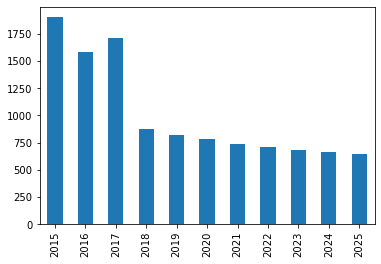

In [ ]:
# Barplot to show how cold segment is changing over the years
df_segments.loc['Cold', :].plot(kind='bar', color='Maroon')

<AxesSubplot:>

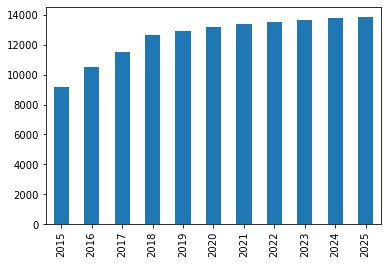

In [ ]:
# Barplot to show how inactive segment is changing over the years
df_segments.loc['Inactive', :].plot(kind='bar', color='Maroon')

In [ ]:
# Rebuild the index
revenue_segment_2015_2 = revenue_segment_2015_1
revenue_segment_2015_2 = revenue_segment_2015_2.set_index("Segment")

In [ ]:
# Set the index
revenue_segment_2015_2.index

Index(['Inactive', 'Cold', 'Warm High Value', 'Warm Low Value', 'New Warm',
       'Active High Value', 'Active Low Value', 'New Active'],
      dtype='object', name='Segment')

In [ ]:
# Build a dataframe to store revenue per segment
revenue_per_segment = pd.DataFrame(df_segments.values*revenue_segment_2015_2.values, columns=df_segments.columns, index=df_segments.index)

In [ ]:
# Get revenue per segment
revenue_per_segment = round(revenue_per_segment,2)

In [ ]:
# Get the yearly revenue
yearly_revenue = revenue_per_segment.sum(axis=0)

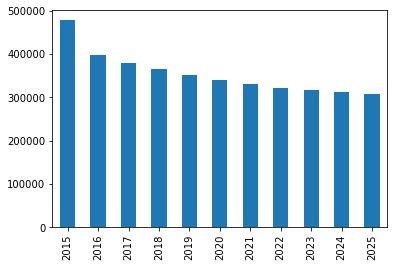

In [ ]:
# Visualize yearly revenue
yearly_revenue.plot.bar(color = 'Maroon')
plt.show()


In [ ]:
# Compute cumulated revenue
cumulative_revenue = yearly_revenue.cumsum()
print(cumulative_revenue)
cumulative_revenue.plot.bar()
plt.show()

In [ ]:
# Create a discount factor
discount_rate = 0.10
discount = [1 / ((1 + discount_rate) ** (i - 1)) for i in range(1,12)]
print(discount)

[1.0, 0.9090909090909091, 0.8264462809917354, 0.7513148009015775, 0.6830134553650705, 0.6209213230591549, 0.5644739300537772, 0.5131581182307065, 0.4665073802097331, 0.42409761837248455, 0.3855432894295314]


In [ ]:
# Compute discounted yearly revenue
disc_yearly_revenue = yearly_revenue * discount
print(round(disc_yearly_revenue))
disc_yearly_revenue.plot.bar()
plt.show()

2015     478394.0
2016     839740.0
2017    1153398.0
2018    1428320.0
2019    1668106.0
2020    1878901.0
2021    2065256.0
2022    2230779.0
2023    2378386.0
2024    2510458.0
2025    2628958.0
dtype: float64


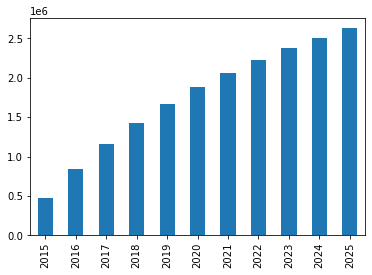

In [ ]:
# Compute discounted cumulated revenue
disc_cumulated_revenue = disc_yearly_revenue.cumsum()
print(round(disc_cumulated_revenue))
disc_cumulated_revenue.plot.bar(color = 'Maroon')
plt.show()

# Calculate CLV and X times worth of the company

In [ ]:
# Expected revenue growth after 10 years
print(round((disc_cumulated_revenue[2025] - yearly_revenue[2015]),0))

2150564.0
